In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score # для оценки производительности модели классификации
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_validate
import numpy as np

df = pd.read_csv('DataSet11_2.csv', sep=';', encoding="cp1251")

#заменяем на 0 и 1 для создания бин. признака
df['SEX'] = df['SEX'].replace('M',0)
df['SEX'] = df['SEX'].replace('F',1)
df = df.drop(['FLAG_RESIDENCIAL_PHONE','FLAG_RESIDENCE_TOWN=WORKING_TOWN','RESIDENCE_TYPE','FLAG_RESIDENCE_STATE=WORKING_STATE','SHOP_RANK','FLAG_FATHERS_NAME','FLAG_MOTHERS_NAME','EDUCATION','MARITAL_STATUS','PERSONAL_REFERENCE_#1','PERSONAL_REFERENCE_#2','FLAG_MOBILE_PHONE','FLAG_CONTACT_PHONE','FLAG_CARD_INSURANCE_OPTION','FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS','FLAG_OTHER_CARD'],axis = 1)
df = df.dropna()
# df.insull().values.any()
df

,ID_CLIENT,ID_SHOP,SEX,AGE,QUANT_DEPENDANTS,AREA_CODE_RESIDENCIAL_PHONE,PAYMENT_DAY,MONTHS_IN_RESIDENCE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_INCOME,QUANT_BANKING_ACCOUNTS,PERSONAL_NET_INCOME,COD_APPLICATION_BOOTH,QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION,TARGET_LABEL_BAD=1
0,2,15,1.0,18,0,31,20,216,12,853,0.0,0,300.0,0.0,0.0,0.0
1,4,12,1.0,47,0,31,25,180,24,35,0.0,0,304.0,0.0,0.0,0.0
2,5,16,1.0,28,0,31,25,12,12,24,0.0,0,250.0,0.0,0.0,0.0
3,6,24,0.0,26,0,31,28,180,0,999,0.0,0,800.0,0.0,0.0,0.0
4,7,55,1.0,22,0,31,12,0,48,999,0.0,0,410.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,49994,1,0.0,29,0,31,12,36,24,305,0.0,0,796.0,0.0,1.0,1.0
39996,49995,12,1.0,20,0,31,20,180,12,712,0.0,0,200.0,0.0,0.0,0.0
39997,49996,19,0.0,21,0,31,12,120,12,218,0.0,0,234.0,0.0,0.0,0.0
39998,49998,23,1.0,23,0,31,28,264,12,991,0.0,0,240.0,0.0,0.0,1.0


In [127]:
df.isnull().values.any()

False

Деление на обучающую и тестовую выборки (80% и 20%)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['TARGET_LABEL_BAD=1'], axis = 1), df['TARGET_LABEL_BAD=1'].values, test_size=0.2, random_state=42)

KNN (k ближайших соседей)

In [129]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(X_train, y_train)
y_kNN = model_knn.predict(X_test)
res = roc_auc_score(y_test, y_kNN) #S под рок-кривой
print('auc_roc', res)
accuracy = accuracy_score(y_test, y_kNN)
print("Точность модели:", accuracy)

auc_roc 0.5103523686679174
Точность модели: 0.7400925115639455


SVM модель (метод опорных векторов)

In [130]:
from sklearn.svm import SVC

#model = SVC(kernel = 'linear')
model_svm = SVC(kernel = 'rbf') #rbf - гаус. ядро 
model_svm.fit(X_train, y_train) #обучение модели
y_SVM = model_svm.predict(X_test)
res = roc_auc_score(y_test, y_SVM) 
print('auc_roc', res)
accuracy = accuracy_score(y_test, y_SVM)
print("Точность модели:", accuracy)

auc_roc 0.5
Точность модели: 0.8001000125015627


Наивный байесовский классификатор (Naive Bayes)

Статистический алгоритм машинного обучения, основанный на теореме Байеса. Он особенно эффективен для задач классификации и прогнозирования, основанных на текстовых данных

In [131]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_NB = model_NB.predict(X_test)
res = roc_auc_score(y_test, y_NB) 
print('auc_roc', res)
accuracy = accuracy_score(y_test, y_NB)
print("Точность модели:", accuracy)

auc_roc 0.5860827568011258
Точность модели: 0.5088136017002125


C4.5 и C5.0 (для построения деревьев принятия решений (Decision Trees))

Он используется для построения деревьев принятия решений для задач классификации. Рекурсивное разделение данных на подгруппы с использованием признаков, которые максимально уменьшают неопределенность (энтропию) в каждой подгруппе.

In [132]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_DT = model_DT.predict(X_test)
res = roc_auc_score(y_test, y_DT) 
print('auc_roc', res)
accuracy = accuracy_score(y_test, y_DT)
print("Точность модели:", accuracy)

auc_roc 0.5232041510318949
Точность модели: 0.6852106513314165


Построение ROC-кривых

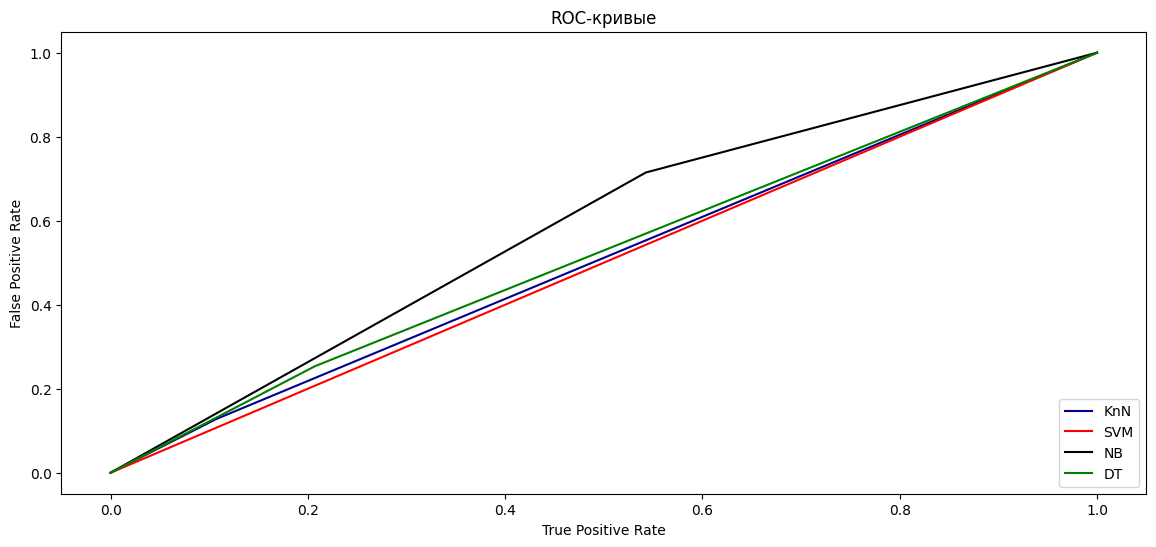

In [133]:
from sklearn.metrics import roc_curve, auc

# вычисляем значения для различных порогов классификации
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_kNN)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_SVM)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_NB)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_DT)

#строим график рок-кривой
plt.figure(figsize=(14, 6))
plt.plot(fpr_knn, tpr_knn, color='darkblue',linestyle = 'solid', label = 'KnN')
plt.plot(fpr_svm, tpr_svm, color='red', linestyle = 'solid',label = 'SVM')
plt.plot(fpr_nb, tpr_nb, color='black',linestyle = 'solid', label = 'NB')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle = 'solid',label = 'DT')

plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc='lower right')
plt.show()

Кросс-валидация

In [134]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_knn, X_test, y_test, scoring='accuracy', cv=4)
print("Кросс-валидация:", scores.mean(), "%")
accuracy = accuracy_score(y_test, y_kNN)
print("Ранее найденная:", accuracy, "%")


Кросс-валидация: 0.7372167333666833 %
Ранее найденная: 0.7400925115639455 %


In [135]:
scores = cross_val_score(model_svm, X_test, y_test, scoring='accuracy', cv=4)
print("Кросс-валидация:", scores.mean(), "%")
accuracy = accuracy_score(y_test, y_SVM)
print("Ранее найденная:", accuracy, "%")

Кросс-валидация: 0.8001000500250126 %
Ранее найденная: 0.8001000125015627 %


In [136]:
scores = cross_val_score(model_NB, X_test, y_test, scoring='accuracy', cv=4)
print("Кросс-валидация:", scores.mean(), "%")
accuracy = accuracy_score(y_test, y_NB)
print("Ранее найденная:", accuracy, "%")

Кросс-валидация: 0.31753139069534764 %
Ранее найденная: 0.5088136017002125 %


In [137]:
scores = cross_val_score(model_DT, X_test, y_test, scoring='accuracy', cv=4)
print("Кросс-валидация:", scores.mean(), "%")
accuracy = accuracy_score(y_test, y_DT)
print("Ранее найденная:", accuracy, "%")

Кросс-валидация: 0.6840854802401202 %
Ранее найденная: 0.6852106513314165 %


Композиции (объединение моделей для решения задач). Поиск более точных и устойчивых решений.

In [138]:
#Композиции
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[
('knn', model_knn),
('svm', model_svm),
('nb', model_NB),
('dt', model_DT)
], voting='hard')

model_voting.fit(X_train, y_train)

voting_pred = model_voting.predict(X_test)
print("Точность на основе нескольких моделей:", accuracy_score(y_test, voting_pred))

Точность на основе нескольких моделей: 0.7897237154644331


In [139]:
scores = cross_val_score(model_voting, X_test, y_test, scoring='accuracy', cv=4)
print("Кросс-валидация:", scores.mean(), "%")

Кросс-валидация: 0.788472736368184 %
